In [0]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_excel('time_series_covid_19_confirmed_US_EDITED.xlsx',sheet_name='Total', index_col='Date', parse_dates=True)
df.head(10)

,Total
Date,
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
2020-01-27,5
2020-01-28,5
2020-01-29,5
2020-01-30,5


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101 entries, 2020-01-22 to 2020-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   101 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [0]:
len(df)

101

In [0]:
#75/25 split
train_data = df.iloc[:77] # Goes up to but not including 76
test_data = df.iloc[76:]

In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Total'],trend='mul',seasonal='mul',seasonal_periods=7).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [0]:
test_predictions = fitted_model.forecast(25).rename('HW Forecast')

In [0]:
test_predictions

2020-04-08    4.365273e+05
2020-04-09    4.816998e+05
2020-04-10    5.223041e+05
2020-04-11    5.754796e+05
2020-04-12    6.217226e+05
2020-04-13    6.825275e+05
2020-04-14    7.705796e+05
2020-04-15    8.218758e+05
2020-04-16    9.069248e+05
2020-04-17    9.833729e+05
2020-04-18    1.083490e+06
2020-04-19    1.170554e+06
2020-04-20    1.285035e+06
2020-04-21    1.450816e+06
2020-04-22    1.547394e+06
2020-04-23    1.707521e+06
2020-04-24    1.851455e+06
2020-04-25    2.039950e+06
2020-04-26    2.203871e+06
2020-04-27    2.419412e+06
2020-04-28    2.731537e+06
2020-04-29    2.913371e+06
2020-04-30    3.214851e+06
2020-05-01    3.485843e+06
2020-05-02    3.840735e+06
Freq: D, Name: HW Forecast, dtype: float64

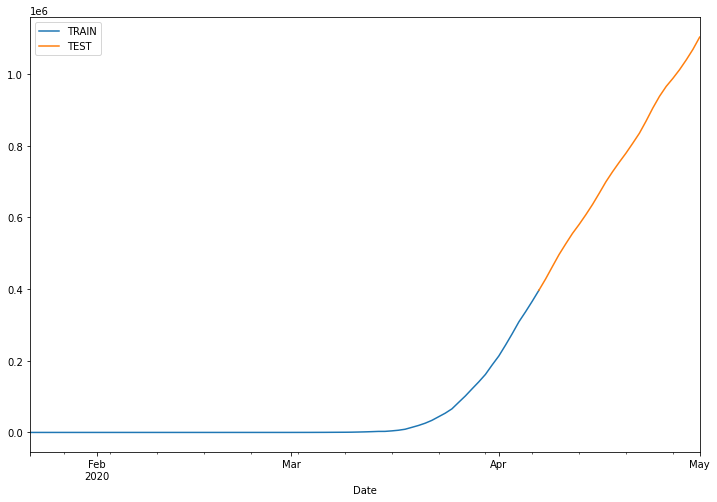

In [0]:
train_data['Total'].plot(legend=True,label='TRAIN')
test_data['Total'].plot(legend=True,label='TEST',figsize=(12,8));

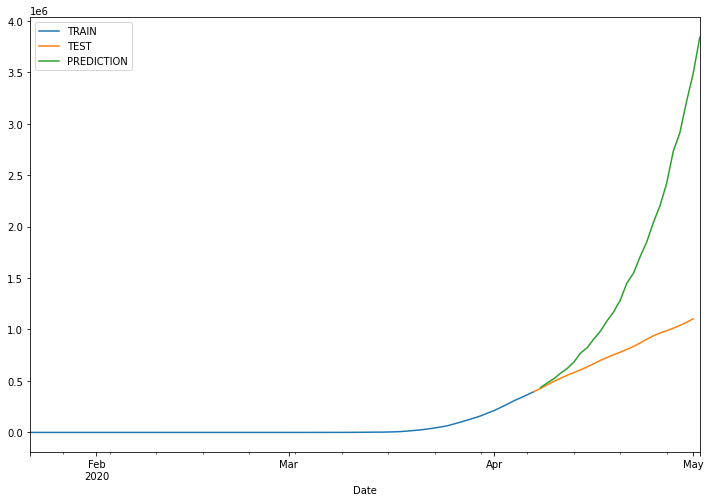

In [0]:
train_data['Total'].plot(legend=True,label='TRAIN')
test_data['Total'].plot(legend=True,label='TEST',figsize=(12,8));
test_predictions.plot(legend=True,label='PREDICTION');

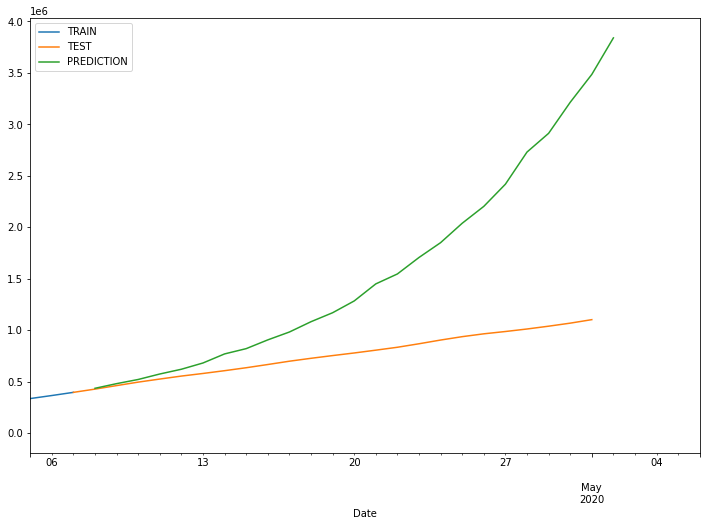

In [0]:
train_data['Total'].plot(legend=True,label='TRAIN')
test_data['Total'].plot(legend=True,label='TEST',figsize=(12,8))
#let's zoom into the period we were predicting for
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-04-05','2020-05-06']);

In [0]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_absolute_error(test_data,test_predictions)

835755.3078144002

In [0]:
import statsmodels.api as sm
# Load a non-stationary dataset
df = pd.read_excel('time_series_covid_19_confirmed_US_EDITED.xlsx',sheet_name='Total',index_col='Date',parse_dates=True)


In [0]:
# Import the models
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
df = pd.DataFrame({'Total':[1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,16,16,24,30,53,73,104,172,217,336,450
,514,708,1105,1557,2147,2857,2918,4307,6096,8873,14094,19403,25725,33634,43663,3736,5778,3836,101657,121465,140909,161831,
188172,213242,243622,275367,308650,336802,366317,397121,428654,462780,496535,526396,555313,580619,607670,636350,667592,699706,
727959,754376,779682,807023,835150,869170,905358,938154,965785,988197,1012582,1039909,1069424,1103461]})
arr = acovf(df['Total'])
arr

array([ 1.13363428e+11,  1.08981667e+11,  1.04604244e+11,  1.00194050e+11,
        9.57796571e+10,  9.12955545e+10,  8.67305493e+10,  8.21324042e+10,
        7.75566993e+10,  7.30418583e+10,  6.85874610e+10,  6.41496522e+10,
        5.97289208e+10,  5.53116753e+10,  5.09126522e+10,  4.65569545e+10,
        4.22923214e+10,  3.81225422e+10,  3.40363203e+10,  3.00235880e+10,
        2.60737321e+10,  2.22231738e+10,  1.84892861e+10,  1.49211665e+10,
        1.15350389e+10,  8.31808634e+09,  5.26904411e+09,  2.38344743e+09,
       -3.48154994e+08, -2.87033293e+09, -5.18341003e+09, -7.28347196e+09,
       -9.20638644e+09, -1.09378057e+10, -1.25251205e+10, -1.39796878e+10,
       -1.52944924e+10, -1.57414486e+10, -1.62066329e+10, -1.66521968e+10,
       -1.74650642e+10, -1.81984890e+10, -1.88690914e+10, -1.94891545e+10,
       -2.00662701e+10, -2.05994280e+10, -2.11094768e+10, -2.16047481e+10,
       -2.20880652e+10, -2.25708250e+10, -2.30469435e+10, -2.35170171e+10,
       -2.39818769e+10, -

In [0]:
#To get unbiased array
ubarr = acovf(df['Total'],unbiased=True)
ubarr

array([ 1.13363428e+11,  1.10082492e+11,  1.06739024e+11,  1.03292835e+11,
        9.97704761e+10,  9.61005837e+10,  9.22665419e+10,  8.83144131e+10,
        8.43007601e+10,  8.02657783e+10,  7.62082900e+10,  7.20782609e+10,
        6.78737737e+10,  6.35766383e+10,  5.92007584e+10,  5.47728877e+10,
        5.03480016e+10,  4.59307737e+10,  4.15077076e+10,  3.70661581e+10,
        3.25921652e+10,  2.81305998e+10,  2.37042130e+10,  1.93781384e+10,
        1.51776828e+10,  1.10907818e+10,  7.12032988e+09,  3.26499647e+09,
       -4.83548602e+08, -4.04272244e+09, -7.40487148e+09, -1.05557565e+10,
       -1.35388036e+10, -1.63250831e+10, -1.89774553e+10, -2.15072119e+10,
       -2.38976443e+10, -2.49864264e+10, -2.61397305e+10, -2.72986833e+10,
       -2.91084403e+10, -3.08448966e+10, -3.25329162e+10, -3.41914991e+10,
       -3.58326252e+10, -3.74535054e+10, -3.90916238e+10, -4.07636756e+10,
       -4.24770484e+10, -4.42565196e+10, -4.60938870e+10, -4.79939124e+10,
       -4.99622435e+10, -

In [0]:
#Autocorrelation for 1D
ACarr = acf(df['Total'])
ACarr

array([ 1.        ,  0.96134767,  0.92273359,  0.88383045,  0.84489027,
        0.80533516,  0.76506639,  0.7245053 ,  0.68414215,  0.64431589,
        0.60502282,  0.56587608,  0.52687998,  0.48791463,  0.44911003,
        0.4106876 ,  0.37306848,  0.33628607,  0.30024075,  0.26484368,
        0.23000127,  0.19603477,  0.16309745,  0.1316224 ,  0.10175274,
        0.0733754 ,  0.04647922,  0.02102484, -0.00307114, -0.02531974,
       -0.04572383, -0.06424887, -0.08121126, -0.09648443, -0.11048643,
       -0.12331744, -0.13491558, -0.13885826, -0.14296174, -0.14689214,
       -0.1540626 ])

In [0]:
#Partial Autocorrelation
PACarr = pacf_yw(df['Total'],nlags=100,method='mle') #Maximum likelihood estimation, nlags = n - 1
PACarr

array([ 1.00000000e+00,  9.61347665e-01, -1.92023088e-02, -2.38971033e-02,
       -2.11444198e-02, -2.92165410e-02, -3.13549018e-02, -2.66519960e-02,
       -2.08520856e-02, -1.67668934e-02, -1.70132552e-02, -2.24261192e-02,
       -2.30101587e-02, -2.52795064e-02, -2.43239940e-02, -2.19147759e-02,
       -1.66651487e-02, -1.62933428e-02, -1.77826626e-02, -1.92903912e-02,
       -2.10247672e-02, -1.72850574e-02, -1.54118251e-02, -9.59383994e-03,
       -7.22846085e-03, -8.29040557e-03, -8.19304467e-03, -8.53117636e-03,
       -9.46262729e-03, -2.63880900e-03, -1.78027941e-03, -3.92753466e-04,
       -3.58637786e-03, -1.31234207e-03, -6.20992025e-03, -7.16804822e-03,
       -5.76330315e-03,  8.06159159e-02, -1.76366493e-02, -1.39818082e-02,
       -5.90660931e-02, -1.01614752e-02, -1.14643212e-02, -1.15797863e-02,
       -1.04964564e-02, -9.20723216e-03, -1.20546857e-02, -1.43591630e-02,
       -1.48937306e-02, -1.62604588e-02, -1.46224012e-02, -1.39406299e-02,
       -1.27800734e-02, -

In [0]:
UBarr2= pacf_yw(df['Total'],nlags=100,method='unbiased')
UBarr2

array([ 1.00000000e+00,  9.71058248e-01, -2.43528368e-02, -3.09945535e-02,
       -2.74201001e-02, -3.89592822e-02, -4.23136585e-02, -3.59283030e-02,
       -2.78765847e-02, -2.21883562e-02, -2.28075172e-02, -3.12361880e-02,
       -3.26043544e-02, -3.66268881e-02, -3.57678607e-02, -3.25296127e-02,
       -2.46599476e-02, -2.44272489e-02, -2.73024326e-02, -3.03749178e-02,
       -3.40136374e-02, -2.85091897e-02, -2.59376375e-02, -1.63384369e-02,
       -1.24010555e-02, -1.45322724e-02, -1.47558260e-02, -1.58574079e-02,
       -1.81364924e-02, -5.75352049e-03, -4.11722383e-03, -1.38971169e-03,
       -7.57888184e-03, -3.28526834e-03, -1.34243104e-02, -1.59747400e-02,
       -1.35335452e-02,  1.70465075e-01, -3.66629548e-02, -3.03936630e-02,
       -1.34635737e-01, -2.64186923e-02, -3.06825922e-02, -2.96882758e-02,
       -2.88704330e-02, -2.58702120e-02, -3.52796182e-02, -4.38480015e-02,
       -4.77353399e-02, -5.33359853e-02, -5.07936517e-02, -5.11466166e-02,
       -4.99482582e-02, -

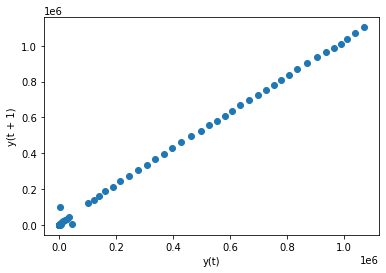

In [0]:
#Plotpoint to show correlation
from pandas.plotting import lag_plot

lag_plot(df['Total']);

In [0]:
#ACF Plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [0]:
# Let's look first at the ACF array.
acf(df['Total']) #41 lags was returned

array([ 1.        ,  0.96134767,  0.92273359,  0.88383045,  0.84489027,
        0.80533516,  0.76506639,  0.7245053 ,  0.68414215,  0.64431589,
        0.60502282,  0.56587608,  0.52687998,  0.48791463,  0.44911003,
        0.4106876 ,  0.37306848,  0.33628607,  0.30024075,  0.26484368,
        0.23000127,  0.19603477,  0.16309745,  0.1316224 ,  0.10175274,
        0.0733754 ,  0.04647922,  0.02102484, -0.00307114, -0.02531974,
       -0.04572383, -0.06424887, -0.08121126, -0.09648443, -0.11048643,
       -0.12331744, -0.13491558, -0.13885826, -0.14296174, -0.14689214,
       -0.1540626 ])

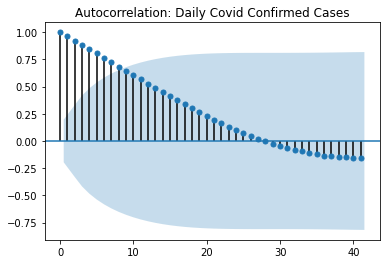

In [0]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Daily Covid Confirmed Cases'
lags = 41
plot_acf(df,title=title,lags=lags);

As seen on the chart, it is one straight gradual decline. Meaning as time goes on, current data would not correlate with data from months ago. Therefore, the amount of COVID cases happening in one month, is independent from the amount of cases from the previous month.


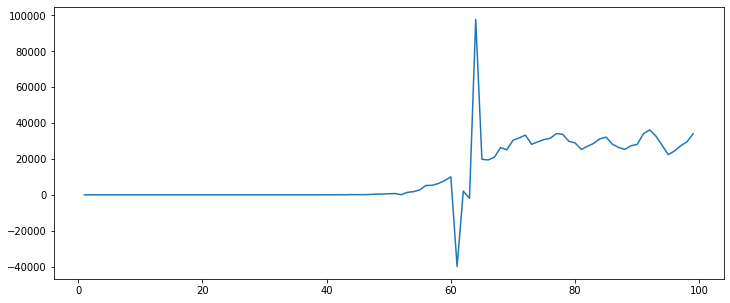

In [0]:
#To make the dataset stationary
from statsmodels.tsa.statespace.tools import diff

df['d1'] = diff(df['Total'],k_diff=1)
df['d1'].plot(figsize=(12,5));

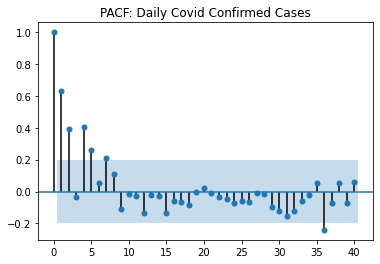

In [0]:
#Use Partial Autocorrelation as it is more effective with stationary data
title='PACF: Daily Covid Confirmed Cases'
lags=41
plot_pacf(df['d1'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

When the data becomes stationary, we see that there is a sharp drop between each points.

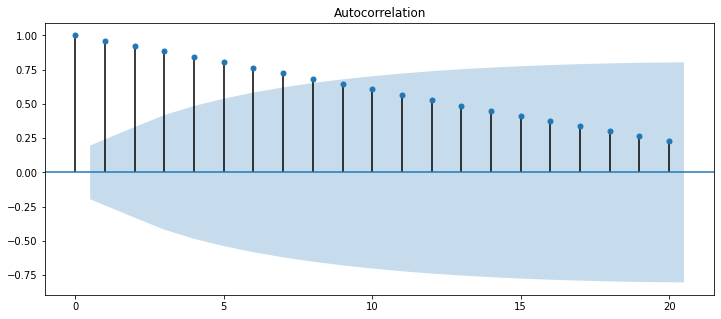

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(df['Total'],ax=ax);

When expanding the full autocorrelation, it is more evident that our gradually declines.
